In [1248]:
##Import modules
import numpy as np
import pandas as pd
import os
from sklearn.cross_validation import KFold ##shifted to preprocessing in later versions of sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.grid_search import GridSearchCV

In [1249]:
os.getcwd()

'C:\\Users\\khrab\\1 - Machine Learning\\Week 6'

In [1250]:
os.chdir('C:\\Users\\khrab\\1 - Machine Learning\\Week 6')

In [1251]:
## (1.)  (a.) load in data and preprocess if necessary. Display statistics.
##            Separate the target attribute for regression.

In [1252]:
##Reading in dataset
comm = pd.read_csv("communities.csv", sep=',')
comm.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [1253]:
##Preprocessing - removing "state" and "community name"
##Data is already normalized.
comm = comm.drop(['state', 'communityname'], axis=1)
comm.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [1254]:
##Additional bit of pre processing to get rid of random question mark value
##I chose to just replace the question mark with a zero since there's only 1.
comm = comm.replace('?', 0)

In [1289]:
##Separate "ViolentCrimesPerPop" as target value
comm_target = comm.ViolentCrimesPerPop
comm_target.head()

0    0.20
1    0.67
2    0.43
3    0.12
4    0.03
Name: ViolentCrimesPerPop, dtype: float64

In [1290]:
##Dropping target from training data
comm_records = comm.drop(['ViolentCrimesPerPop'], axis=1)
comm_records

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.04,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02
5,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,...,0.00,0.00,0.70,0.42,0.49,0.73,0.64,0.01,0.58,0.10
6,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,0.23,0.60,...,0.00,0.00,0.15,0.81,0.77,0.91,0.84,0.05,0.08,0.06
7,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,0.36,0.35,...,0.00,0.00,0.59,0.58,0.52,0.79,0.78,0.01,0.33,0.00
8,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,0.28,0.48,...,0.01,0.00,0.01,0.78,0.48,0.79,0.75,0.04,0.17,0.04
9,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,0.80,0.39,...,0.00,0.00,0.22,0.42,0.34,0.23,0.09,0.00,0.47,0.11


In [1291]:
##Displaying basic statistics
comm_records.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,...,0.029438,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685
std,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,...,0.102607,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.000000,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.000000,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.010000,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1292]:
comm_target.describe()

count    1994.000000
mean        0.237979
std         0.232985
min         0.000000
25%         0.070000
50%         0.150000
75%         0.330000
max         1.000000
Name: ViolentCrimesPerPop, dtype: float64

In [1293]:
##(1.)  (b.)  Perform standard linear regression on data using implementation
##            from ch8 of MLA. Compute RMSE value on the full training data.
##            Also plot the correlation between the predicted and actual values
##            of the target attribute. Display the obtained regression coeff.
##            Finally, perform 10-fold cross val and compare cross val RMSE
##            to training RMSE

In [1294]:
## Checking shapes
print(comm_records.shape)
print(comm_target.shape)

(1994, 97)
(1994,)


In [1295]:
##Adding column of 1's to represent bias
comm_recs = np.array(comm_records)
comm_recs

array([[0.19, 0.33, 0.02, ..., 0.12, 0.26, 0.2],
       [0.0, 0.16, 0.12, ..., 0.02, 0.12, 0.45],
       [0.0, 0.42, 0.49, ..., 0.01, 0.21, 0.02],
       ...,
       [0.16, 0.37, 0.25, ..., 0.08, 0.32, 0.18],
       [0.08, 0.51, 0.06, ..., 0.03, 0.38, 0.33],
       [0.2, 0.78, 0.14, ..., 0.11, 0.3, 0.05]], dtype=object)

In [1296]:
x = np.array([np.concatenate((v,[1])) for v in comm_recs])
y = comm_target

In [1297]:
##Standard Linear Regression, default params on full training data.
linreg = LinearRegression()
linreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1349]:
##Root mean squared error on entire training data
p = linreg.predict(x)
err = abs(p-y)

total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))
print(rmse_train)

0.13700407419915384


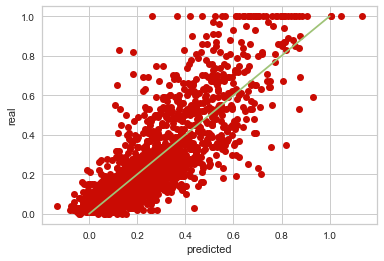

In [1299]:
##Plotting correlation between predicted and actual
%matplotlib inline
pl.plot(p, y, 'ro')
pl.plot([0,1], [0,1], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

In [1300]:
##Show regression coefficients
print('Regression Coefficients: \n', linreg.coef_)

Regression Coefficients: 
 [ 0.13 -0.03  0.21 -0.04 -0.01  0.06  0.12 -0.22 -0.15  0.05 -0.24  0.05 -0.2
 -0.21  0.05 -0.18  0.06  0.01 -0.09  0.27  0.1  -0.33 -0.03 -0.04  0.02  0.04
  0.03  0.13 -0.19 -0.1   0.06  0.11  0.    0.23 -0.04 -0.01  0.47  0.23  0.17
 -0.58 -0.14  0.06 -0.35 -0.04  0.    0.06 -0.18 -0.15  0.13 -0.14  0.02  0.03
 -0.07  0.04 -0.03 -0.22  0.45 -0.2  -0.03 -0.14  0.06 -0.21  0.65 -0.08 -0.25
 -0.67  0.2   0.1   0.03  0.17 -0.04  0.55  0.05 -0.08 -0.03  0.01 -0.01 -0.35
  0.27  0.01 -0.24 -0.03 -0.07  0.37  0.04 -0.04 -0.08  0.13  0.18  0.13  0.
 -0.02  0.03  0.01  0.03 -0.01 -0.04  0.  ]


In [1301]:
## RMSE using 10-fold cross-validation
n = 10
kf = KFold(len(x), n_folds = n)
xval_err = 0
for train,test in kf:
    linreg.fit(x[train], y[train])
    p = linreg.predict(x[test])
    e = p-y[test]
    xval_err += np.sqrt(np.dot(e,e)/len(x[test]))
rmse_10cv = xval_err/n

In [1302]:
## Comparing 10-fold to training RMSE
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 0.1289
RMSE on 10-fold CV: 0.1358


In [1303]:
##(1.)  (c.) Feature selection: function that finds optimal percentage
##           of most informative features to use. Using cv = 5.
##           Also using f_regression, and mean_absolute error.

from sklearn.datasets import load_digits
from sklearn import feature_selection

In [1304]:
##First, building training and test datasets.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(comm_records, comm_target, test_size = 0.2, random_state = 33)

In [1305]:
from sklearn import cross_validation
percentiles = range(1, 100, 5)
results = []
for i in range (1, 100, 5):
    vals = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = i)
    X_train_vals = vals.fit_transform(X_train, y_train)
    ##cv = 5
    scores = cross_validation.cross_val_score(linreg, X_train_vals, y_train, cv=5, scoring='neg_mean_absolute_error')
    results = np.append(results, scores.mean())
    

    
optimal_percentile = np.where(results == results.max())[0]
opt_per = optimal_percentile[0]
print ("Optimal percentile of features:{0}".format(percentiles[opt_per]))
optimal_num_features = int(percentiles[opt_per]*len(comm_records.columns)/100)
print ("Optimal number of features:{0}".format(optimal_num_features))

Optimal percentile of features:41
Optimal number of features:39


In [1306]:
##Showing list of most informative features to use

for i in range(len(comm_records.columns.values)):
    if vals.get_support()[i]:
        print(comm_records.columns.values[i], '\t\t', vals.scores_[i])

population 		 256.0323547372104
householdsize 		 3.492519416199981
racepctblack 		 1074.8895092675332
racePctWhite 		 1412.507812392418
racePctHisp 		 137.54043215678004
agePct12t21 		 4.894803532795912
agePct12t29 		 37.3340149651141
agePct16t24 		 15.875055643949556
agePct65up 		 8.24793840554524
numbUrban 		 247.77613854814712
pctUrban 		 11.060895847737793
medIncome 		 341.6325375231915
pctWWage 		 161.57075094157048
pctWFarmSelf 		 40.34422029878609
pctWInvInc 		 756.0149723312642
pctWSocSec 		 22.486379068173935
pctWPubAsst 		 784.5706408092445
pctWRetire 		 13.975623750024441
medFamInc 		 366.9004218440599
perCapInc 		 214.9931579906875
whitePerCap 		 65.44623454922727
blackPerCap 		 126.57709861890288
indianPerCap 		 12.317095444554939
AsianPerCap 		 29.069227068932687
OtherPerCap 		 33.3127248404565
HispPerCap 		 92.36570683066239
NumUnderPov 		 400.30785689079215
PctPopUnderPov 		 578.8173652137692
PctLess9thGrade 		 319.21810810192335
PctNotHSGrad 		 472.1962078690574
PctBSo

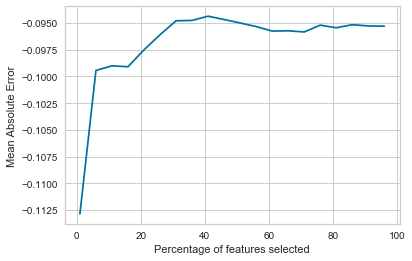

In [1307]:
##Plotting model's mean absolute error values on cross validation
##relative to percentage of selected features.
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Mean Absolute Error")
pl.plot(percentiles,results)

In [1308]:
##(1.)  (d.) Next, perform ridge regression and lasso regression
##           using the modules from sklearn.linear_model. In each
##           case, perform systematic model selection to identify
##           the optimal alpha parameter. First, create a 20%-80%
##           randomized split of the data. Set aside the test 
##           portion; the model selection process should be 
##           performed using the 80% training data partition. You
##           You should create a function that takes as input
##           the data and target variable; the parameter to vary
##           and its list of values; the model to be trained;
##           and any other relevant input needed to determine
##           the optimal value for the specified parameter. The
##           model selection process should perform k-fold cross
##           validation (k=5). Plot error values on training
##           and cross-validation splits across the specified vals
##           of the alpha parameter. Using the best alpha, run the
##           model on the set-aside test data. Discuss observation
##           and conclusions

In [1309]:
##Creating 20-80 split
X_tr, X_te, y_tr, y_te = train_test_split(comm_records, comm_target, test_size = 0.2, random_state = 33)

In [1310]:
X_tr.shape

(1595, 97)

In [1311]:
y_tr.shape

(1595,)

In [1312]:
##Array of possible alpha values
alphas = np.linspace(.1,5,20)

In [1313]:
##gridsearch allows us to explore results of different alpha values,
## which is essentially what the above is doing anyway:
dt = linear_model.Ridge()

In [1314]:
dt.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [1315]:
##Here is a function that will print all relevant information for us
def fit(model, params, K, X_train, y_train):
    
    means = []
    parameters = {'alpha': params}
    gs = GridSearchCV(model, parameters, verbose=1, cv=5)
    temp = gs.fit(X_train, y_train)
    scores = temp.grid_scores_
    print(gs.best_score_)
    print(gs.best_params_)
    for score in scores:
        
        meanlist = score[2]
        
        sums = sum(meanlist)
        mean = sums/(len(meanlist))
        means.append(mean)
    
    
    plt.plot(params, means, label = 'Train', alpha=0.4, lw=2, c='b')
    plt.legend(loc=7)
    plt.xlabel("alphas")
    plt.ylabel("mean scores")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.6647260182508206
{'alpha': 0.8736842105263158}


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


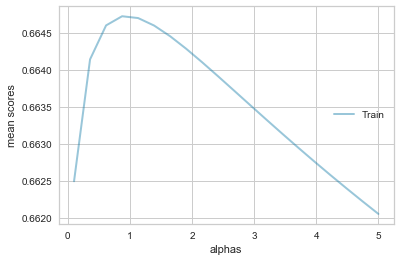

In [1316]:
fit(dt, alphas, 5, X_tr,  y_tr)

In [1317]:
##From this we can confirm that .87 is best alpha score for the ridge model
##We can do this for Lasso as well
##Creating 20-80 split
X_tr2, X_te2, y_tr2, y_te2 = train_test_split(comm_records, comm_target, test_size = 0.2, random_state = 33)
alphas2 = np.linspace(1, 40, 20)
dt2 = linear_model.Lasso()
dt2.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

Fitting 5 folds for each of 20 candidates, totalling 100 fits
-0.00401750101992544
{'alpha': 1.0}


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


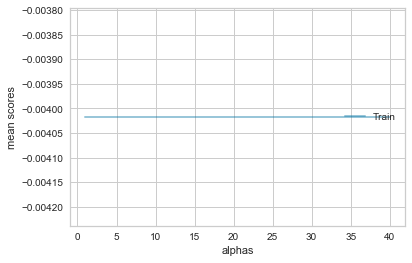

In [1355]:
##Trying to fit for Lasso doesn't seem to have the same effect...
fit(dt2, alphas2, 5, X_tr2,  y_tr2)

In [1356]:
##Trying ridge with the given alpha:
clf = linear_model.Ridge(alpha=.87)
X = np.array(X_te2)
##Adding 1 for bias
x = np.array([np.concatenate((v,[1])) for v in X])
print(x.shape)
y = y_te2
print(y.shape)

(399, 98)
(399,)


In [1357]:
clf.fit(x, y_te2)

Ridge(alpha=0.87, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [1358]:
p = clf.predict(x)
err = abs(p-y)

total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))
print(rmse_train)

0.12832699157840008


In [1397]:
##Trying ridge with the given alpha:
clf2 = linear_model.Lasso(alpha=.87)
X = np.array(X_te)
##Adding 1 for bias
x = np.array([np.concatenate((v,[1])) for v in X])
print(x.shape)
y = y_te
print(y.shape)

(399, 98)
(399,)


In [1398]:
clf2.fit(x, y_te)

Lasso(alpha=0.87, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [1399]:
p = clf2.predict(x)
err = abs(p-y)
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))
print(rmse_train)

0.2394261653678638


In [1400]:
##I think something's incorrect with Lasso: I don't necessarily think 1.0 is the 
##best alpha value, I think it was incorrectly guessing them due to an
##error choosing the best alpha(?)

In [1363]:
##(1.)  (e.)  
##Perform regression using SGD for regression. For this part, 
##use the SGDRegressor module. Again, start by creating randomized
##80-20 train test split. SGD requires features be standardized
##(with 0 mean and scaled by standard dev.) Prior to fitting, perform
##scaling using StandardScaler. Perform grid search. Your grid
##search should compare combinations of: l1, l2, different vals
##of alpha. Using best params, apply model to the set-aside test set.
##Finally, perform model selection to find best "l1_ratio" param
##Using the SGDRegressor with 'elasticnet' penalty param.
##Using the best mixing ration, apply Elastic Net model to set-aside
##Test data. Provide summary of findings.

In [1367]:
##New 80-20 split
xtrain, xtest, ytrain, ytest = train_test_split(comm_records, comm_target, test_size = 0.2, random_state = 33)

In [1421]:
##Standardizing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
scaler = StandardScaler()
scaler.fit(xtrain)
x_s = scaler.transform(xtrain)

In [1422]:
sgd = SGDRegressor()

In [1423]:
##Finding Best Parameters
sgd.get_params()

{'alpha': 0.0001,
 'average': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'max_iter': None,
 'n_iter': None,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': None,
 'verbose': 0,
 'warm_start': False}

In [1435]:
##Grid Search Combinations
parameters = {
    'penalty': ['elasticnet', 'l1', 'l2'],
    'alpha' : np.linspace(.0001, 20, 10)   
}

In [1436]:
##Grid Search
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    grid = GridSearchCV(sgd, parameters, verbose=1, cv=5)
    gridfit = grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.1s finished


In [1437]:
##Select Best Model
gridfit.best_params_

{'alpha': 0.0001, 'penalty': 'l2'}

In [1438]:
##Select Best Model to run on test data
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sgdmodel = linear_model.SGDRegressor(alpha=.0001)
    sgdmodel.fit(xtest, ytest)
    X = np.array(xtest)
    print(X.shape)
    y = ytest
    print(y.shape)

(399, 97)
(399,)


In [1439]:
p = sgdmodel.predict(X)
err = abs(p-y)
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))
print(rmse_train)

0.1528491249392419


In [1440]:
##Summary of findings
##My observation here is that grid search is delightful for finding 
##the best parameters for your model. It's nice that it's able
##to go through all possible combinations (or a smaller ratio with
##randomizedCSV if dealing with lots of data) and effortlessly
##find you the combination that's likely to give you the best results.

In [ ]:
##(2.)  (a.) Create your own distance function that, instead of
## using euclidean distance, uses cosine similarity
##This is the distance function you will use to pass to the
##kMeans function

In [1801]:
def cosine(xvals, yvals):
    sumxbyx, sumxbyy, sumybyy = 0, 0, 0
    xvals = xvals[:,0]
    for i in range(len(xvals)):
    
        x = xvals[i]; y = yvals[i]
        sumxbyx += x*x
        sumybyy += y*y
        sumxbyy += x*y
    
    
    return sumxbyy/math.sqrt(sumxbyx*sumybyy)

In [ ]:
##(2.)  (b.)  load data set.
## You'll need to transpose the matrix so it's a document-term matrix
## split the doc term matrix 80-20 train-test (random subset)

In [1733]:

## Import all data sets

##Full term-by-document matrix - same as testMatrix/trainMatrix
##But needs transformed and split.
matrix = pd.read_csv('matrix.txt', delimiter=',', header = None)
##Actual category labels - same as trainClasses/testClasses
##But needs split
classes = pd.read_csv('classes.txt', delimiter=' ', header = None)
##readding class labels
class_labels= ['windows(0)', 'crypt(1)', 'christian(2)', 'hockey(3)', 'forsale(4)']
##Dictionary (vocabulary) - same as modifiedterms.txt
terms = pd.read_csv('terms.txt', header = None)


In [1734]:
##Transforming to document - term, additional preprocessing
matrix_temp = np.array(matrix)
news_matrix = np.array(matrix.T)
temp = classes.values
classes = temp[:,1]

In [1735]:
numTerms = len(terms)
numTerms

9328

In [1736]:
##Splitting into test and train
news_train, news_test, news_targ_train, news_targ_test = train_test_split(news_matrix, classes)

In [1737]:
print(news_train[:10])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [1738]:
print(news_targ_train[:150])

[2 0 1 3 4 1 3 1 1 1 0 2 2 4 2 2 2 1 2 0 3 1 3 2 4 3 4 1 2 1 2 1 2 2 4 3 3 4 0
 0 3 0 1 0 1 3 3 0 0 0 2 1 3 4 3 4 4 2 3 4 0 0 4 2 0 2 2 3 0 3 0 0 1 0 3 0 1 1
 0 3 4 1 2 2 2 1 2 4 0 4 1 3 4 3 3 3 2 4 2 1 1 0 4 2 2 3 3 4 3 1 2 2 4 3 0 2 0
 4 2 4 0 0 2 3 2 3 1 1 1 0 3 0 2 4 2 1 1 4 0 3 0 3 1 4 3 2 0 0 3 0]


In [1739]:
##(2.)  (c.)  Perform kmeans clustering on the training data
## Write a function to display the top N terms in each cluster
## along with the cluster DF values for each term and the size
## of the cluster. The cluster DF value for a term t in cluster C is
## the percentage of docs in cluster c in which term t appears
## (so, if a cluster has 500 docs, and term "game" appears in 100 of)
## those 500 documents, then DF value of "game" in that cluster is
## 0.2 or 20%). Sort the terms for each cluster in decreasing order
## of the DF percentage

In [1740]:
##Perform Kmeans clustering
kmeans = KMeans(n_clusters=5, max_iter=500, verbose=1)
kmeans.fit(news_train)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1329096.7133689835
start iteration
done sorting
end inner loop
Iteration 1, inertia 1329096.7133689835
center shift 0.000000e+00 within tolerance 2.179895e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 3047327.6982343565
start iteration
done sorting
end inner loop
Iteration 1, inertia 3047327.6982343565
center shift 0.000000e+00 within tolerance 2.179895e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1329096.7133689835
start iteration
done sorting
end inner loop
Iteration 1, inertia 1329096.7133689835
center shift 0.000000e+00 within tolerance 2.179895e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1329096.7133689835
start iteration
done sorting
end inner loop
Iteration 1, inertia 1329096.7133689835
center shift 0.000000e+00 within tolerance 2.179895e-03
Initiali

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [1741]:
clusters = kmeans.predict(news_train)
print(clusters)

[0 0 0 ... 0 0 0]


In [1742]:
clusters.shape

(1875,)

In [1743]:
news_targ_train.shape

(1875,)

In [1744]:
print(news_targ_train)

[2 0 1 ... 4 1 3]


In [1745]:
print(class_labels)
print(kmeans.cluster_centers_)

['windows(0)', 'crypt(1)', 'christian(2)', 'hockey(3)', 'forsale(4)']
[[0.01 0.   0.04 ... 0.01 0.   0.01]
 [0.   0.   0.   ... 0.5  0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]


In [1746]:
##Checking Unique Target Elements
print(set(news_targ_train))

{0, 1, 2, 3, 4}


In [1747]:
from sklearn.metrics import completeness_score, homogeneity_score
print(completeness_score(news_targ_train, clusters))

0.1926580202169781


In [1748]:
## Write a function to display the top N terms in each cluster
## along with the cluster DF values for each term and the size
## of the cluster. The cluster DF value for a term t in cluster C is
## the percentage of docs in cluster c in which term t appears
## (so, if a cluster has 500 docs, and term "game" appears in 100 of)
## those 500 documents, then DF value of "game" in that cluster is
## 0.2 or 20%). Sort the terms for each cluster in decreasing order
## of the DF percentage

In [1818]:
import kMeans

In [1819]:
##Testing cosine for part e.
cos= cosine(news_train, news_targ_train)
cos

0.02075238715757256

In [1824]:
##Testing kMeans import
centroids, clst = kMeans.kMeans(news_train, 3, kMeans.distEuclid, kMeans.randCent)

In [1825]:
print(centroids)

[[0.   0.   0.   ... 0.25 0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.01 0.   0.04 ... 0.01 0.   0.01]]


In [1826]:
print(clst)

[[  2.   451.9 ]
 [  2.    28.78]
 [  2.   122.15]
 ...
 [  2.    22.66]
 [  2.   131.66]
 [  2.   230.09]]


In [1828]:
##Using PCA to obtain top 5 components
from sklearn import decomposition
pca = decomposition.PCA(n_components=5)
DTtrans= pca.fit(news_train).transform(news_train)

In [1829]:
print(DTtrans)

[[-22.48  -0.44   0.08  -0.37  -0.18]
 [-22.47  -0.43  -1.3   -0.27  -0.16]
 [-22.47  -0.33  -0.12  -0.35  -0.18]
 ...
 [-22.47  -0.43  -1.34  -0.3   -0.18]
 [-22.47  -0.41   0.18  -0.36  -0.21]
 [-22.47  -0.43  -1.    -0.31  -0.09]]


In [1831]:
print(pca.explained_variance_ratio_)
##Looks like just the first component explains all of the variance

[1. 0. 0. 0. 0.]


In [1832]:
##the imported kMeans that we're required to use doesn't seem to allow
##a foreign function so I'm wondering how we're expected to input our
##Cosine similarity function? Hours later I still can't get parts of this
##working.
centroids_pca, clusters_pca = kMeans.kMeans(DTtrans, 3, kMeans.distEuclid, kMeans.randCent)

In [1833]:
print(clusters_pca)

[[0.   0.36]
 [0.   1.96]
 [0.   0.27]
 ...
 [0.   2.09]
 [0.   0.36]
 [0.   1.28]]


In [1837]:
##I'm sorry, I'm really struggling on this part
##I would like to go over how to do this in class please.
##Below are my completeness and Homogeneity scores 
print(completeness_score(news_targ_train, clusters))
print(homogeneity_score(news_targ_train,clusters))

0.1926580202169781
0.0026365670910393686
